# Reducción de la dimensionalidad

Curso de Verano "Python for Big Data"  
Profesor: Steven Van Vaerenbergh (Universidad de Cantabria)

<ul style="list-style-type:none">
    <li><a href='#1.-PCA'>1. PCA</a></li>
    <ul style="list-style-type:none">
        <li><a href="#1.1-Ejemplo-PCA">1.1 Ejemplo PCA</a></li>
        <li><a href="#1.2-Ejercicio-PCA">1.2 Ejercicio PCA</a></li>
    </ul>
    <li><a href="#2.-t-SNE">2. t-SNE</a></li>
     <ul style="list-style-type:none">
        <li><a href="#2.1-Ejercicio-t-SNE">2.1 Ejercicio t-SNE</a></li>
    </ul>
    <li><a href="#3.-Tarea-adicional:-Swiss-roll">3. Tarea adicional: Swiss roll</a></li>
</ul>

In [1]:
# cargamos los módulos más usados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# opción para garantizar que las figuras aparezcan en el notebook
%matplotlib inline

## 1. PCA

In [2]:
# cargamos el algoritmo PCA
from sklearn.decomposition import PCA

### 1.1 Ejemplo PCA

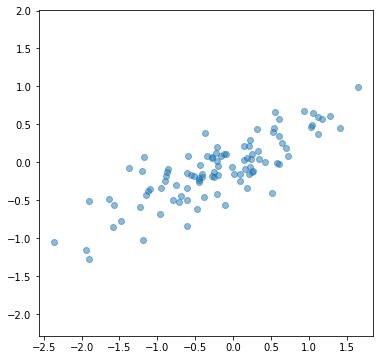

In [3]:
# generamos datos en forma de una nube de puntos alargada (Gaussiana 2D)

np.random.seed(seed=1)

mu = [0,0]
sigma = [[0.9,0.35],[0.35,0.2]]
n = 100
X = np.random.multivariate_normal(mu, sigma, n)

# visualizamos los datos
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.5)

plt.axis([-3,3,-3,3])
plt.axis('equal');

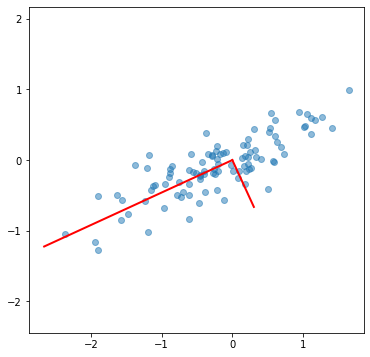

In [4]:
# aplicamos PCA para encontrar las direcciones principales

pca = PCA(n_components=2)

pca.fit(X)

# visualizamos el resultado
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for e_, v_ in zip(pca.singular_values_, pca.components_):
    plt.plot([0, e_*v_[0]/3], [0, e_*v_[1]/3], 'r-', lw=2)

plt.axis([-3,3,-3,3]);
plt.axis('equal');

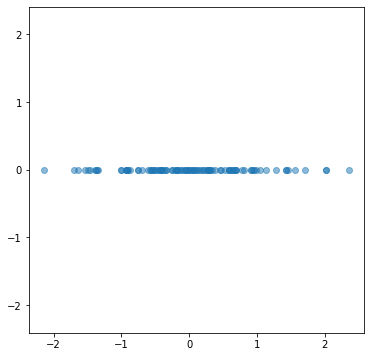

In [5]:
# reducimos los datos a una dimensión

pca = PCA(n_components=1)

pca.fit(X)
X_r = pca.transform(X)

# visualizamos el resultado
plt.figure(figsize=(6, 6))
plt.scatter(X_r, np.zeros(len(X_r)), alpha=0.5)

plt.axis([-3,3,-3,3]);
plt.axis('equal');

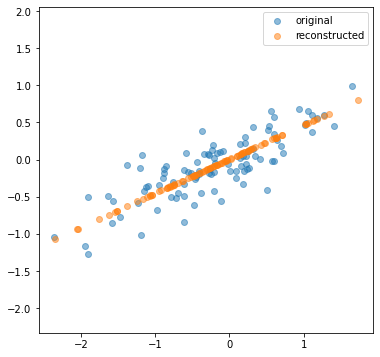

In [6]:
# reconstruimos los datos originales

X_rec = pca.inverse_transform(X_r)

# visualizamos el resultado
plt.figure(figsize=(6, 6))

plt.scatter(X[:,0], X[:,1], alpha=0.5, label='original')
plt.scatter(X_rec[:,0], X_rec[:,1], alpha=0.5, label='reconstructed')

plt.legend()

plt.axis([-3,3,-3,3]);
plt.axis('equal');

### 1.2 Ejercicio PCA

El conjunto de datos de Iris representa 3 tipos de flores de Iris (Setosa, Versicolour y Virginica) con 4 atributos: longitud del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo.

In [7]:
# cargamos los datos del dataset
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

# miramos los datos
print('Tamaño de X: %dx%d\n'%(X.shape[0],X.shape[1]))

print('Primeras 5 filas:')
print(X[:5])

Tamaño de X: 150x4

Primeras 5 filas:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
X.shape[0]

150

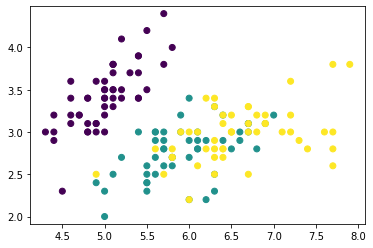

In [9]:
# visualizamos las primeras 2 columnas
plt.figure()

plt.scatter(X[:,0], X[:,1], c=y)

plt.axis('equal');

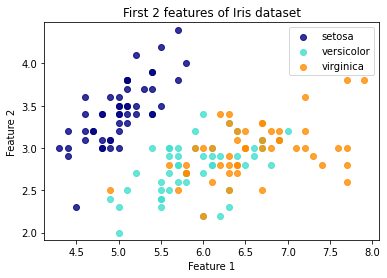

In [10]:
# mejoramos la figura un poco
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('First 2 features of Iris dataset')

plt.axis('equal');
plt.show()

<div class = "alert alert-info">
     <b> Tarea: </b> Aplica PCA sobre los datos de Iris.
        Reduce la dimensionalidad a 2 y dibuja las características obtenidas después de la reducción.
        Analiza los contenidos del atributo calculado <code>pca.explained_variance_ratio_</code>.
</div>

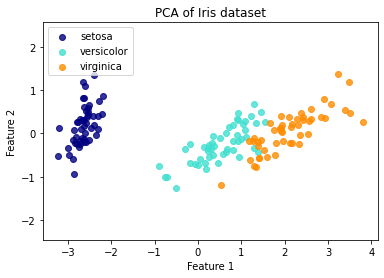

Explained variance ratio: [0.92461872 0.05306648]


In [20]:
# Escribe tu código aquí:

pca = PCA(n_components=2)

pca.fit(X)
X_r = pca.transform(X)

# visualizamos el resultado
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA of Iris dataset')

plt.axis('equal')
plt.show()

print('Explained variance ratio:',pca.explained_variance_ratio_)

Observa que en el ejercicio anterior no hemos usado los valores de las etiquetas, menos para visualizar el resultado.

## 2. t-SNE

In [21]:
from sklearn.manifold import TSNE

# cargamos también el módulo para medir tiempos
from time import time

### 2.1 Ejercicio t-SNE

En este ejercicio reduciremos la dimensionalidad del conjunto de datos "digits" para representar todos los dígitos en un mapa 2D.

Tamaño del dataset: (1797, 8, 8)


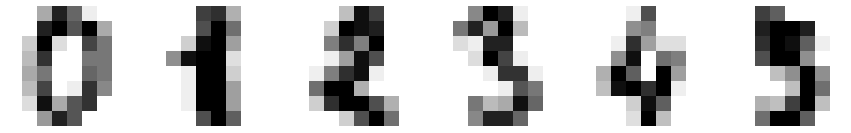

In [22]:
# cargamos los datos
from sklearn import datasets

digits = datasets.load_digits()

# visualizamos los primeros 6 dígitos
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))
for ax, image in zip(axes, digits.images):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)

print('Tamaño del dataset:', digits.images.shape)

Tomaremos cada data como un vector de 64 (=8x8) elementos.

In [23]:
X = digits.data
y = digits.target

print('Tamaño de X:', digits.data.shape)

Tamaño de X: (1797, 64)


Primero aplicaremos PCA. Calculamos los 64 componentes para poder hacer un análisis completo.

In [24]:
# inicializamos el modelo PCA 
pca = PCA()

# entrenamos el modelo PCA. Medimos el tiempo de ejecución
t0 = time()
pca.fit(X)
t1 = time()
print("PCA: %.2g seg" % (t1 - t0))

PCA: 0.026 seg


Visualizamos la cantidad de varianza explicada por cada componente principal:

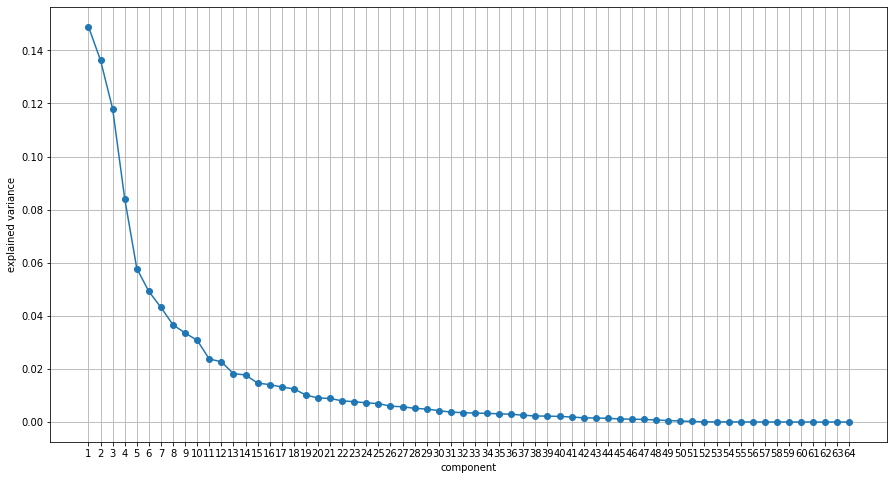

In [25]:
plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_,'-o')
plt.xlabel('component')
plt.ylabel('explained variance')

# Improve the labels of the x axis
n_components = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n_components), np.arange(1,n_components+1))

plt.grid(True)
plt.show()

Producimos la versión acumulativa de la figura anterior, para analizar cuánta varianza es mantenida por las `n` componentes primeras:

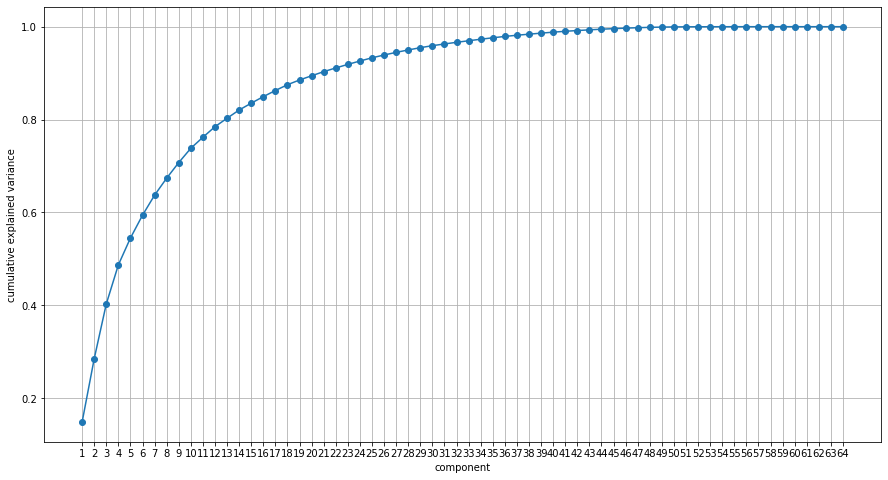

In [26]:
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15,8))
plt.plot(explained_variance_cumulative,'-o')
plt.xlabel('component')
plt.ylabel('cumulative explained variance')

# Improve the labels of the x axis
n_components = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n_components), np.arange(1,n_components+1))

plt.grid(True)
plt.show()

Podemos observar que con tan solo 2 componentes mantenemos muy poca de la varianza de los datos:

In [27]:
print('Varianza acumulativa para la primera y las primeras 2 componentes: ',explained_variance_cumulative[:2])

Varianza acumulativa para la primera y las primeras 2 componentes:  [0.14890594 0.28509365]


Para llegar al 95% de la varianza tendríamos que usar 29 componentes:

In [28]:
print('Varianza acumulativa para la 27, 28 y 29 componentes: ',explained_variance_cumulative[27:30])

Varianza acumulativa para la 27, 28 y 29 componentes:  [0.94990113 0.95479652 0.9590854 ]


Finalmente, generamos el mapa usando solo 2 componentes PCA:

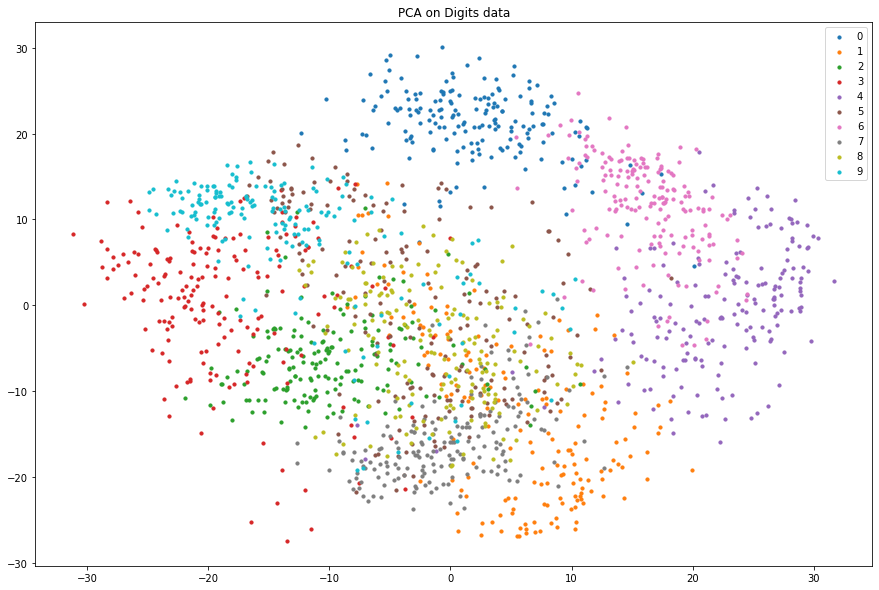

In [29]:
X_pca = pca.transform(X)

# dibujamos el mapa de 2 componentes, asignando colores según la etiqueta verdadera
fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Plot all the points of class i
    ax.scatter(X_pca[i,0], X_pca[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("PCA on Digits data")
plt.show()

<div class = "alert alert-info">
     <b> Tarea: </b> Ahora usa el algoritmo t-SNE con <code>TSNE(n_components=2,...)</code> para generar un mapa 2D
        de los datos anteriores.</code>.
</div>

/Users/carlosmeneses/Projects/Curso de Verano/Unsupervised-Learning/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


t-SNE: 3.5 seg


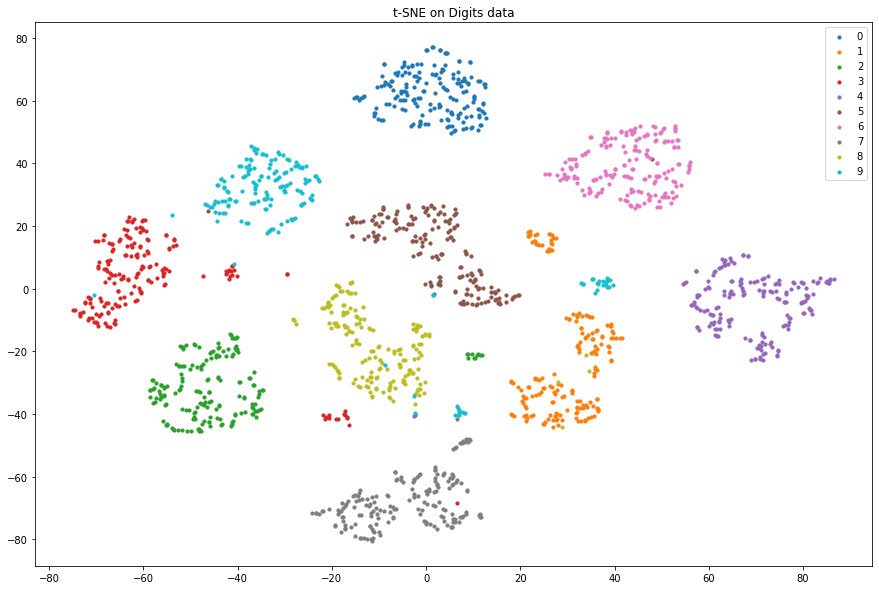

In [32]:
# Escribe tu código aquí:

# inicializamos el modelo t-SNE 
tsne = TSNE(n_components=2, random_state=0, perplexity=10, init="pca", learning_rate="auto")

# entrenamos el modelo PCA. Medimos el tiempo de ejecución
t0 = time()
X_tsne = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g seg" % (t1 - t0))

# dibujamos el mapa de 2 componentes, asignando colores según la etiqueta verdadera
fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Plot all the points of class i
    ax.scatter(X_tsne[i,0], X_tsne[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("t-SNE on Digits data")
plt.show()

## 3. Tarea adicional: Swiss roll

El dataset Swiss roll es un conjunto frecuentemente usado para probar técnicas de reducción de la dimensionalidad:

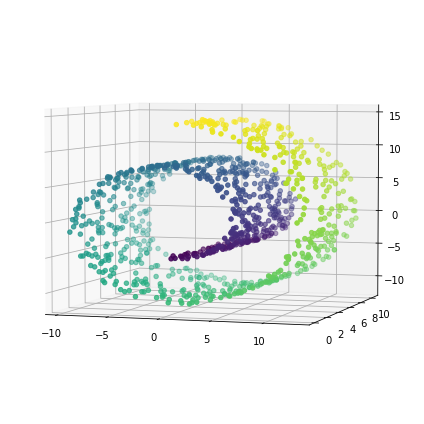

Tamaño de los datos: 1000x3



In [41]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# generamos los datos (swiss roll dataset)
n_points = 1000
noise = 0.05
X, color = make_swiss_roll(n_points, noise=noise)

# hacemos el conjunto algo más fino
X[:, 1] *= .5

# visualizamos los datos
fig = plt.figure(figsize=(6, 6))

ax = Axes3D(fig, rect=[0, 0, .95, 1], auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.view_init(4, -72)

plt.show()

print('Tamaño de los datos: %dx%d\n'%(X.shape[0],X.shape[1]))

<div class = "alert alert-info">
     <b> Tarea: </b> Prueba distintas técnicas para reducir la dimensionalidad de los datos a 2,
        de tal forma que los datos obtenidos representan el Swiss roll "desenvuelto" como un rectángulo de puntos.
        Prueba las siguientes técnicas: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html">Isomap</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html">LLE</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">t-SNE</a>.
</div>

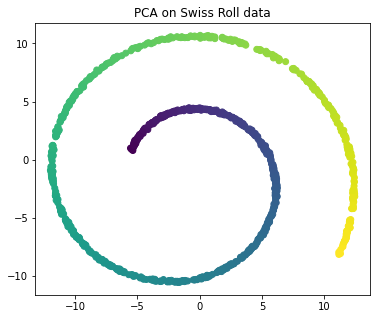

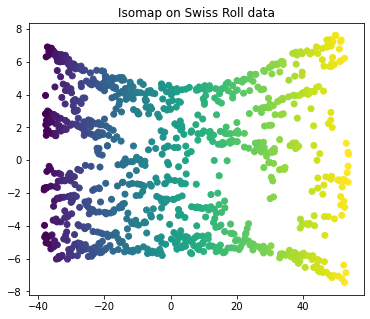

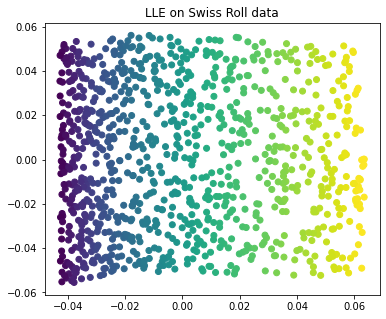

/Users/carlosmeneses/Projects/Curso de Verano/Unsupervised-Learning/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/carlosmeneses/Projects/Curso de Verano/Unsupervised-Learning/.venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


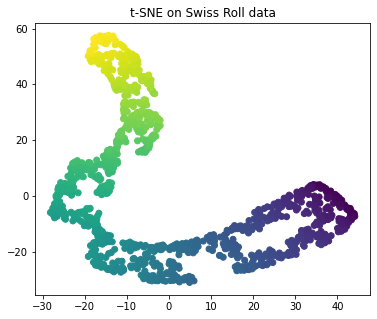

In [42]:
# Escribe tu código aquí:

from sklearn.manifold import LocallyLinearEmbedding, Isomap


# PCA

n_components = 2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("PCA on Swiss Roll data")
plt.axis('tight')
plt.show()


# Isomap

n_neighbors = 10
n_components = 2

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_isomap = isomap.fit_transform(X)

fig = plt.figure(figsize=(6, 5))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("Isomap on Swiss Roll data")
plt.axis('tight')
plt.show()


# LLE

n_neighbors = 10
n_components = 2

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, 
                             eigen_solver='auto',method='modified')
X_lle = lle.fit_transform(X)

fig = plt.figure(figsize=(6, 5))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("LLE on Swiss Roll data")
plt.axis('tight')
plt.show()


# t-SNE

perplexity = 1
n_components = 2

tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("t-SNE on Swiss Roll data")
plt.axis('tight')
plt.show()